In [17]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
import pandas as pd
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

import matplotlib
import matplotlib.pyplot as plt 
import matplotlib as mpl
from matplotlib.backends import backend_agg
from matplotlib.colors import LinearSegmentedColormap

In [18]:
data = pd.read_csv('iris.csv')
data.head

<bound method NDFrame.head of      5.1  3.5  1.4  0.2     Iris-setosa
0    4.9  3.0  1.4  0.2     Iris-setosa
1    4.7  3.2  1.3  0.2     Iris-setosa
2    4.6  3.1  1.5  0.2     Iris-setosa
3    5.0  3.6  1.4  0.2     Iris-setosa
4    5.4  3.9  1.7  0.4     Iris-setosa
..   ...  ...  ...  ...             ...
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0  Iris-virginica
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica

[149 rows x 5 columns]>

In [19]:
X = data.iloc[:,0:4].values
y = data.iloc[:,4].values

print(X[0:5])
print(y[0:5])

print(X.shape)
print(y.shape)

[[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]]
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
(149, 4)
(149,)


In [20]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
print(y1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


In [21]:
Y = pd.get_dummies(y1).values
print(Y[0:5])

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train[0:5])

[[5.2 3.4 1.4 0.2]
 [5.1 2.5 3.  1.1]
 [6.2 2.9 4.3 1.3]
 [5.9 3.2 4.8 1.8]
 [5.1 3.8 1.5 0.3]]


In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation= 'softmax')
])
model.compile(optimizer = "rmsprop",
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', 'categorical_crossentropy'])

In [24]:
model = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=50, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 284ms/step - loss: 1.0410 - accuracy: 0.3697 - categorical_crossentropy: 1.0410 - val_loss: 1.1067 - val_accuracy: 0.2667 - val_categorical_crossentropy: 1.1067
Epoch 2/100
3/3 [==============================] - 0s 33ms/step - loss: 1.0120 - accuracy: 0.3529 - categorical_crossentropy: 1.0120 - val_loss: 1.0875 - val_accuracy: 0.2333 - val_categorical_crossentropy: 1.0875
Epoch 3/100
3/3 [==============================] - 0s 25ms/step - loss: 0.9995 - accuracy: 0.3697 - categorical_crossentropy: 0.9995 - val_loss: 1.0782 - val_accuracy: 0.2667 - val_categorical_crossentropy: 1.0782
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 0.9931 - accuracy: 0.3529 - categorical_crossentropy: 0.9931 - val_loss: 1.0640 - val_accuracy: 0.2667 - val_categorical_crossentropy: 1.0640
Epoch 5/100
3/3 [==============================] - 0s 14ms/step - loss: 0.9831 - accuracy: 0.3445 - categorical_crossentropy: 0.9831 - val_loss

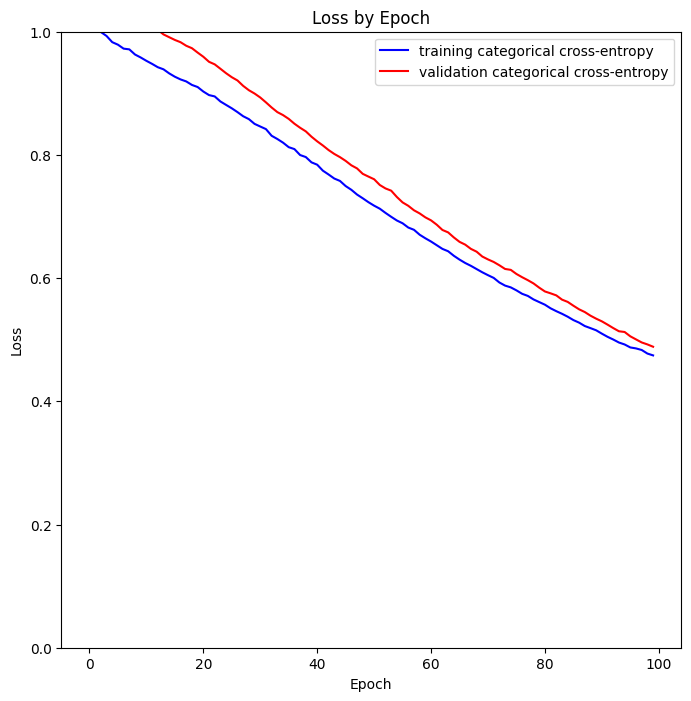

In [25]:
plt.figure(figsize=(8,8))
plt.plot(model.history['loss'], label='training categorical cross-entropy', color='blue')
plt.plot(model.history['val_loss'], label='validation categorical cross-entropy', color='red')
plt.title('Loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 1.0])
plt.legend(loc='upper right')

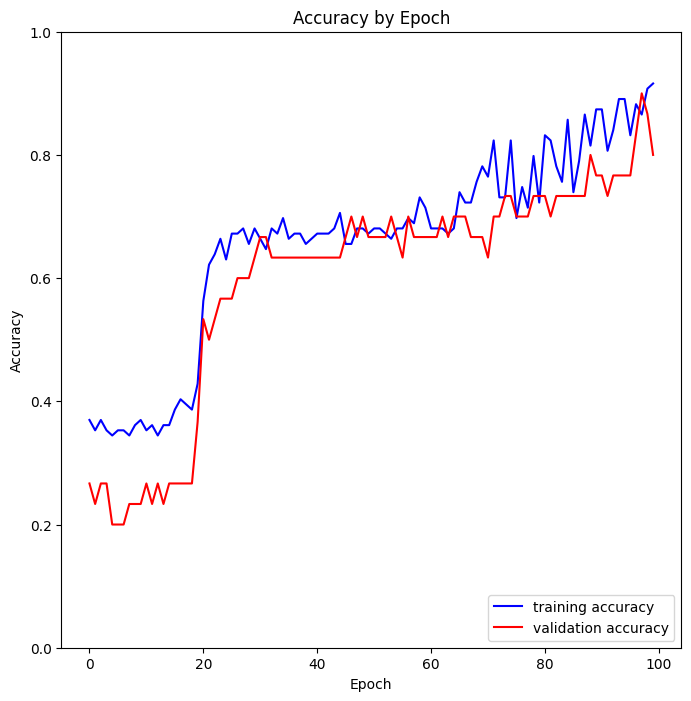

In [26]:
plt.figure(figsize=(8,8))
plt.plot(model.history['accuracy'], label='training accuracy',color='blue')
plt.plot(model.history['val_accuracy'], label = 'validation accuracy',color='red')
plt.title('Accuracy by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.])
plt.legend(loc='lower right')